# ELECTRIC BILL PREDICTION USING MACHINE LEARNING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/EB.csv")

In [ ]:
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.1,2,1,658.285625


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.dtypes

num_rooms               int64
num_people              int64
housearea              object
is_ac                  object
is_tv                  object
is_flat                object
ave_monthly_income     object
num_children            int64
is_urban                int64
amount_paid           float64
dtype: object

## Univariate anayalsis

Num_rooms

In [ ]:
df["num_rooms"].isna().sum()

0

In [ ]:
df["num_rooms"].unique()

array([ 3,  1,  0,  4,  2,  5, -1])

There are sample with values -1, removing those values cause predictive variable is a household, if it is outside (under presumption) then we can gladly remove it.

In [ ]:
len(df[df["num_rooms"] == -1])

5

In [ ]:
df = df[df["num_rooms"] != -1]

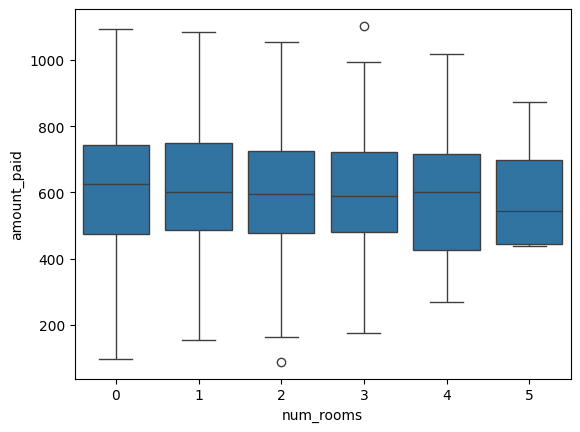

In [ ]:

sns.boxplot(x = "num_rooms", y = "amount_paid", data = df)
plt.show()

one can notice the no of rooms samples are decreasing which is direct impact on amount_paid, 'quite normal'

num_people

In [ ]:
df["num_people"].isna().sum()

0

In [ ]:
df["num_people"].unique()

array([ 3,  5,  1,  8,  4,  6,  7,  2,  9,  0, 10, 11, -1])

In [ ]:
df[df["num_people"] == -1]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
170,4,-1,1058.32,1,0,0,17182.76,4,0,598.938184
658,3,-1,673.71,0,1,1,30987.64,0,1,510.691209
768,1,-1,803.67,0,1,1,25087.46,0,1,484.601514
833,2,-1,594.82,0,1,0,34875.33,1,1,558.698355


Removing -1 samples cause there will not be appliance usage without people (household)

In [ ]:
df = df[df["num_people"] != -1]

In [ ]:
df

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.1,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92',0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


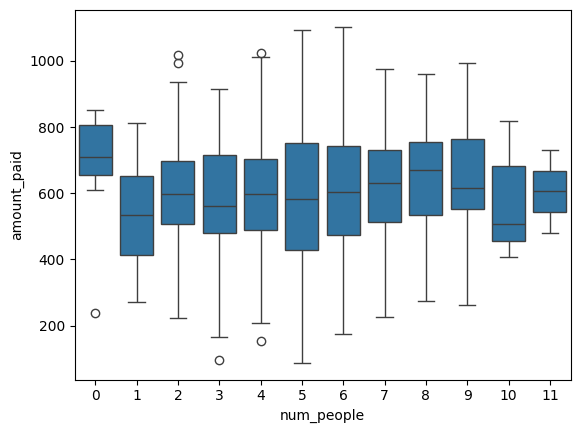

In [ ]:

sns.boxplot(x = "num_people", y = "amount_paid", data = df)
plt.show()

Fairly a normal distribution, the graph simulates based on intution that average range of members per household must be 3-7

housearea

In [ ]:
non_numeric_rows = df[~df['housearea'].apply(pd.to_numeric, errors='coerce').notnull()]
non_numeric_rows

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
305,1,7,696.3',0,1,0,30768.18,1,1,532.482793
313,3,8,631.54',0,1,1,12107.02,1,1,756.087230
378,3,1,851.93',0,0,0,16419.26,1,1,567.040685
381,0,6,620.29',1,0,0,31055.69,1,1,747.975083
489,5,5,NaN,0,1,0,31100.16,1,1,640.203745
822,2,7,NaN,0,1,0,25772.23,3,1,739.276558
904,0,6,NaN,0,1,0,30721.85,0,0,348.141104
933,2,3,NaN,0,1,0,10398.38,2,0,456.795816
969,2,6,NaN,0,0,0,21220.11,0,1,495.153671
986,3,5,NaN,0,1,1,22728,1,0,538.103211


Removing non numeric rows and converting the value to flot 64

In [ ]:
df = df[df['housearea'].apply(pd.to_numeric, errors='coerce').notnull()]


In [ ]:

df['housearea'] = df['housearea'].astype(float)

<ipython-input-57-9c4a43b824b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housearea'] = df['housearea'].astype(float)


In [ ]:
df['housearea'].dtype

dtype('float64')

In [ ]:
df

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.1,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92',0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


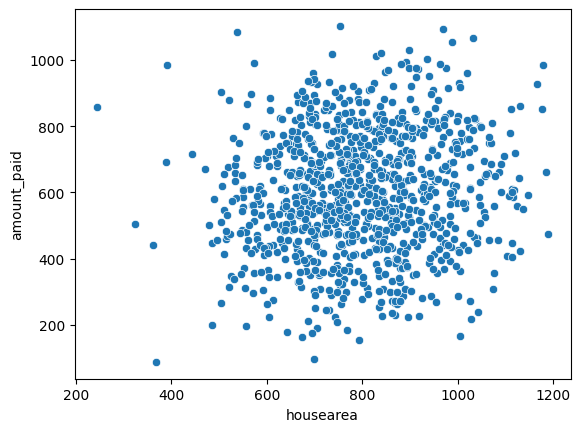

In [ ]:

import matplotlib.pyplot as plt
sns.scatterplot(x = "housearea", y = "amount_paid", data = df)
plt.show()


One can see the amount paid increases with housearea

is_ac

In [ ]:
df[df["is_ac"].isna() == True]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
156,1,7,658.86,NaN,1,1,35701.06,1,0,534.176617
165,3,5,836.50,NaN,1,1,28629.77,2,1,862.217572
347,3,5,773.66,NaN,0,1,35807.59,0,1,770.538442


In [ ]:
df = df[df["is_ac"].isna() == False]


is_flat

In [ ]:
df[df["is_tv"].isna() == True]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
160,2,3,800.96,0,NaN,0,30971.97,2,0,455.347605
169,1,4,704.72,0,NaN,0,20191.55,1,1,500.821097
177,2,4,880.15,0,NaN,0,22242.58,2,1,616.882502
348,2,2,1075.89,0,NaN,1,16451.71,0,0,357.784461
351,1,8,843.47,1,NaN,1,33015.78,0,1,770.575759


In [ ]:
df = df[df["is_tv"].isna() == False]


In [ ]:
df.shape

(973, 10)

In [ ]:
df = df[df["is_flat"].isna() == False]

In [ ]:
df.shape

(973, 10)

In [ ]:
df["is_ac"].unique()

array(['1', '0', "0'", "1'"], dtype=object)

In [ ]:
# prompt: ['1', '0', "0'", "1'"] df["is_ac"].unique() convert 0' to 0 and 1' to 1

df["is_ac"] = df["is_ac"].replace({
    "0'": "0",
    "1'": "1"
})


In [ ]:
df["is_ac"].unique()

array(['1', '0'], dtype=object)

In [ ]:
df["is_ac"] = df["is_ac"].astype("int")


In [ ]:
df["is_flat"] = df["is_flat"].replace({
    "0'": "0",
    "1'": "1"
})

df["is_flat"] = df["is_flat"].astype("int")


In [ ]:
df["is_flat"].unique()

array([1, 0])

In [ ]:
df["is_tv"].unique()

array(['1', '0', "1'"], dtype=object)

In [ ]:
df["is_tv"] = df["is_tv"].replace({
    "0'": "0",
    "1'": "1"
})

df["is_tv"] = df["is_tv"].astype("int")


In [ ]:
df["is_tv"].unique()

array([1, 0])

In [ ]:
df.dtypes

num_rooms               int64
num_people              int64
housearea             float64
is_ac                   int64
is_tv                   int64
is_flat                 int64
ave_monthly_income     object
num_children            int64
is_urban                int64
amount_paid           float64
dtype: object

In [ ]:
df["ave_monthly_income"].isna().sum()

2

In [ ]:
df = df[df["ave_monthly_income"].isna() == False]


In [ ]:
df.shape

(971, 10)

In [ ]:

df["ave_monthly_income"] = df["ave_monthly_income"].apply(lambda x: x[:-1] if x.endswith("'") else x)
df["ave_monthly_income"] = df["ave_monthly_income"].astype(float)


<ipython-input-91-5a2fbadd00b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ave_monthly_income"] = df["ave_monthly_income"].apply(lambda x: x[:-1] if x.endswith("'") else x)
<ipython-input-91-5a2fbadd00b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ave_monthly_income"] = df["ave_monthly_income"].astype(float)


In [ ]:
df["num_children"].isna().sum()

0

In [ ]:
df["is_urban"].isna().sum()

0

PREPROCESSED DATA HEAD

In [ ]:
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [ ]:
df.shape

(971, 10)

In [ ]:
X = df.drop(["amount_paid"],axis = 1)


In [ ]:
Y = df["amount_paid"]

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test = TTS(X,Y,test_size=0.3,random_state=2)


In [ ]:
x_train.shape,x_test.shape

((679, 9), (292, 9))

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)


MSE: 4110.390366530342
MAE: 55.53471421456223
R2: 0.8811828948607504


#ACCURACY: 88%
### Able to explain 88% variance of response variable using feature matrix X.

# Decision Tree Regressor

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print("MSE:", mse_dt)
print("MAE:", mae_dt)
print("R2:", r2_dt)


Decision Tree Regressor:
MSE: 7366.003385730515
MAE: 69.32430736684931
R2: 0.78707443315726


# ACCURACY : 78%
using DTR

#LASSO

In [ ]:

from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("MSE:", mse_lasso)
print("MAE:", mae_lasso)
print("R2:", r2_lasso)

Lasso Regression:
MSE: 4110.255823006267
MAE: 55.53484576247131
R2: 0.881186784046599


# RIDGE

In [ ]:

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)
print("R2:", r2_ridge)


Ridge Regression:
MSE: 4109.980073438455
MAE: 55.53221998602226
R2: 0.8811947550085927


# ACCURACY: 88%
RIGDE Regression

#MODEL GRAPH

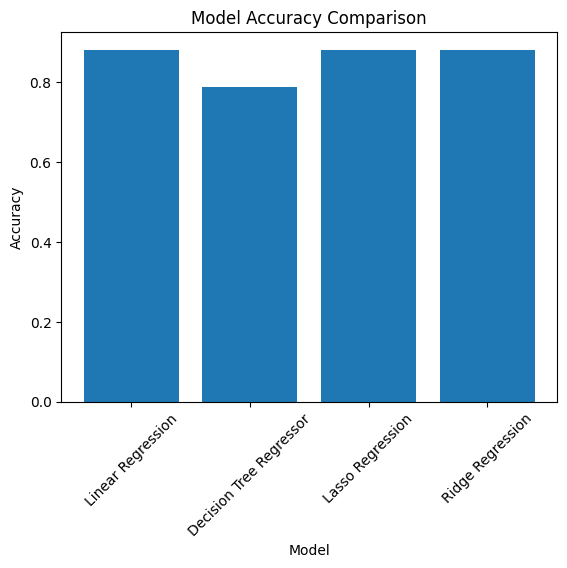

In [ ]:

models = ['Linear Regression', 'Decision Tree Regressor', 'Lasso Regression', 'Ridge Regression']
accuracies = [r2, r2_dt, r2_lasso, r2_ridge]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.tick_params(axis='x', rotation=45)
plt.show()


In [ ]:

import pandas as pd

models = ['Linear Regression', 'Decision Tree Regressor', 'Lasso Regression', 'Ridge Regression']
accuracies = [r2, r2_dt, r2_lasso, r2_ridge]

df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(df.to_string())


                     Model  Accuracy
0        Linear Regression  0.881183
1  Decision Tree Regressor  0.787074
2         Lasso Regression  0.881187
3         Ridge Regression  0.881195


#THANK YOU ❣️